# ch04 신경망 학습

`학습`이란 훈련 데이터로 부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 뜻한다.  
이번 장에서는 신경망이 학습할 수 있도록 해주는 `지표`인 손실함수를 다룬다.  
이 손실함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는것이 학습의 목표이다.  
손실함수의 값을 가급적 작게 만드는 기법으로, 함수의 기울기를 활용하는 경사법을 다룬다.

## 4.1 데이터에서 학습한다!

신경망의 특징은 데이터를 보고 학습할 수 있다는 점이다.   
데이터에서 학습한다는 것은 가중치 매개변수의 값을 데이터를 보고 자동으로 결정한다는 뜻이다.  
2장의 퍼셉트론 예에서는 진리표를 보면서 사람이 수작업으로 매개변수를 설정했지만 그때는 매개변수가 3개 뿐이었다.  
실제 신경망에서는 매개변수가 수천에서 수억개가 되므로, 매개변수를 수작업으로 정한다는 것은 아예 불가능하다. 

2장의 퍼셉트론도 직선으로 분리할 수 있는(선형분리가능) 문제라면 데이터로 부터 자동으로 학습할 수 있다.  
선형 분리 가능 문제는 유한번의 학습을 통해 풀 수 있다는 사실이 `퍼셉트론 수렴 정리`로 증명되었다.  
하지만 비선형 분리 문제는 자동으로 학습할 수 없다.

### 4.1.1 데이터 주도 학습

기계학습은 데이터가 중요하다.  
데이터가 없으면 아무것도 시작되지 않는다.
그래서 기계학습의 중심에는 `데이터`가 존재한다.  
MNIST 데이터셋에서 5를 제대로 분류하는 프로그램을 작성하려면, 알고리즘을 밑바닥부터 '설계하는'대신, 주어진 데이터를 잘 활용해서 해결해야한다.  
그런 방법의 하나로, 이미지에서 `특징(feature)`을 추출하고 그 특징의 패턴을 기계학습 기술로 학습하는 방법이 있다.  여기서 말하는 특징은 입력데이터(입력 이미지)에서 본질적인 데이터(중요한 데이터)를 정확하게 추출할 수 있도록 설계된 변환기를 가리킨다.  
이미지의 특징은 보통 벡터로 기술하고, 컴퓨터 비전 분야에서는 SIFT, SURF, HOG등의 특징을 많이 사용한다.  이런 특징을 사용하여 이미지 데이터를 벡터로 변환하고, 변환된 벡터를 가지고 지도 학습 방식의 대표 분류 기법인 SVM, KNN등으로 학습할 수 있다.

문제에 적합한 특징을 쓰지 않으면 좋은 결과를 얻을 수 없다.  
예를 들어 개의 얼굴을 구분하려 할때는 숫자를 인식할 때와는 다른 특징을 '사람'이 생각해 내야한다.   
즉, 특징과 기계학습을 활용한 접근에도 문제에 따라서는 '사람'이 적절한 특징을 생각해내야한다.

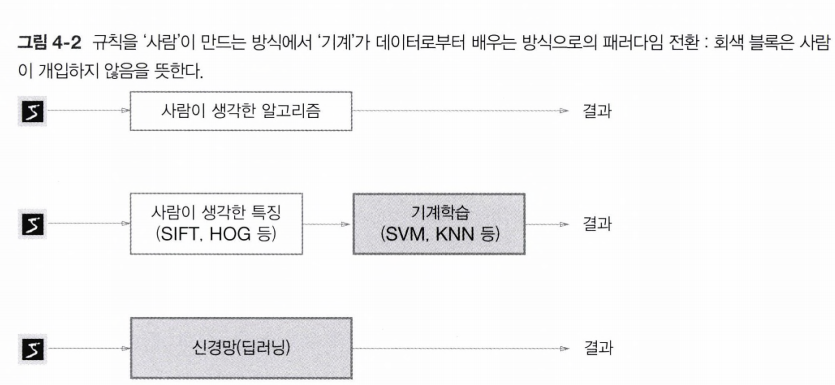

위의 그림과 같이 신경망은 이미지를 있는 그대로 학습한다.  
특징과 기계학습 방식에서는 특징을 사람이 설계했지만, 신경망은 이미지에 포함된 중요한 특징까지도 '기계'가 스스로 학습한다.

신경망의 이점은 모든 문제를 같은 맥락에서 풀 수 있다는 점에 있다.  
예를 들어 '5'를 인식하는 문제든, '개'를 인식하는 문제든, 아니면 '사람의 얼굴'을 인식하는 문제든,  세부사한과 관계없이 신경망은 주어진 데이터를 온전히 학습하고, 주어진 문제의 패턴을 발견하려 시도한다.  즉, 신경망은 모든 문제를 주어진 데이터 그대로를 입력 데이터로 활용해 'end-to-end'로 학습할 수 있다.

### 4.1.2 훈련데이터와 시험 데이터

기계학습 문제는 데이터를 `훈련 데이터(training data)`와 `시험 데이터(test data)`로 나눠 학습과 실험을 수행하는 것이 일반적이다.  
우선 훈련 데이터만 사용하여, 학습하면서 최적의 매개변수를 찾는다.  그런 다음 시험 데이터를 사용하여 앞서 훈련한 모델의 실력을 평가하는 것이다.  
`범용 능력`을 제대로 평가하기 위해 훈련데이터와 `시험 데이터`를 분리하는 것이다.  
범용능력은 아직 보지 못한 데이터(훈련 데이터에 포함되지 않는 데이터)로도 문제를 올바르게 풀어내는 능력이다.  
이 범용능력을 획득하는 것이 기계학습의 최종 목표이다. 
한 데이터셋에만 지나치게 최적화 된 상태를 `오버피팅(overfitting)`이라고 한다.  

## 4.2 손실함수

신경망은 '하나의 지표'를 기준으로 최적의 매개변수 값을 탐색한다.  
신경망 학습에서 사용하는 지표는 `손실 함수(loss function)`라고 한다.  
이 손실 함수는 임의의 함수를 사용할 수도 있지만 일반적으로는 오차제곱합과 교차 엔트로피 오차를 사용한다.

### 4.2.1 오차제곱합

가장 많이 쓰이는 손실함수는`오차제곱합(sum of squares for error)`이다.

$$E = \frac{1}{2}*\sum_{k}(y_k-t_k)^2$$

여기서 $y_k$는 신경망의 출력(신경망이 추정한값), $t_k$는 정답레이블, $k$는 데이터의 차원 수를 나타낸다.</br>
이를테면, "MNIST 숫자 인식"예에서 $y_k$와 $t_k$는 다음과 같은 원소 10개짜리 데이터이다.

In [1]:
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
t = [0,0,1,0,0,0,0,0,0,0]

이 배열들의 원소는 첫 번째 인덱스부터 순서대로 숫자 '0','1','2',...일때 값이다.  
여기에서 신경망의 출력 y는 소프트 맥스 함수의 출력이다.  
소프트맥스 함수의 출력은 확률로 해석할 수 있으므로, 이 예에서는 이미지가 '0'일 확률은 
0.1, '1'일 확률은 0.05, '2'일 확률은 0.6이다.  
정답 레이블인 t는 정답을 가리키는 위치의 원소는 1로, 그 외에는 0으로 표기한다.  
여기에서는 숫자 '2'에 해당하는 값이 1이므로 정답이 '2'이다.  
이처럼 한 원소만 1로 하고 그 외는 0으로 나타내는 표기법을 `원-핫 인코딩`이라 한다.


In [2]:
import numpy as np

In [3]:
def sum_squares_error(y,t):
    return 0.5* np.sum((y-t)**2)

In [4]:
# 예 1 : '2'일 확률이 가장 높다고 추정함(0.6)
y = [0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
t = [0,0,1,0,0,0,0,0,0,0]

In [5]:
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [6]:
# 예 2 : '7'일 확률이 가장 높다고 추정함(0.6)
y = [0.1,0.05,0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]

In [7]:
sum_squares_error(np.array(y), np.array(t))

0.5975

예 1은 정답이 '2'이고, 신경망의 출력도 '2'에서 가장 높은 경우이다.  
예 2는 정답은 똑같이 '2'지만, 신경망의 출력은 '7'에서 가장 높다.
오차제곱합 기준으로 첫 번째 추정 결과가 오차가 더 작으니, 정답에 가깝다.

### 4.2.2 교차 엔트로피 오차

또 다른 손실 함수로 `교차 엔트로피 오차(Cross entropy error), CEE`도 자주 이용한다.

$$E = -\sum_{k}t_k*logy_k$$

여기에서 log는 밑이 $e$인 자연로그이다.  
$y_k$는 신경망의 출력, $t_k$는 정답 레이블이다.
또, $t_k$는 정답에 해당하는 인덱스의 원소만 1이고, 나머지는 0이다.(원-핫 인코딩)  
그래서 실질적으로 정답일때의 추정($t_k$가 1일 때의 $y_k$)의 자연로그를 계산하는 식이 된다.

예를 들어 정답 레이블은 '2'가 정답이라 하고, 이때의 신경망 출력이 0.6이면  
-log0.6 = 0.51이 된다.  
또한, 같은 조건에서 신경망 출력이 0.1이라면 -log0.1 = 2.30이 된다.  
즉, 교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 된다.

In [8]:
import matplotlib.pyplot as plt
import math

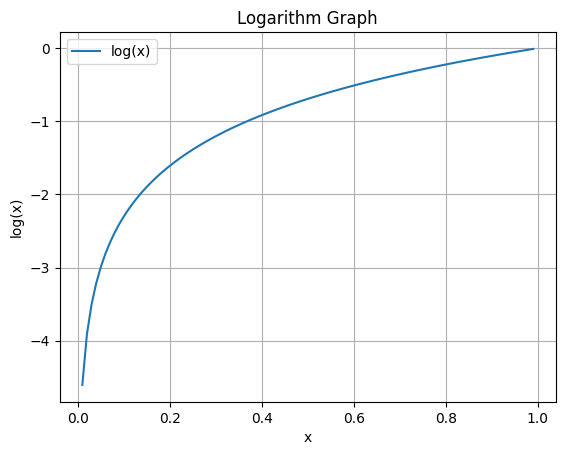

In [9]:
# x 배열 생성 (0을 제외한 작은 값부터 시작)
x = np.arange(0.01, 1, 0.01)

# 로그 값 계산
y = np.log(x)

# 그래프 그리기
plt.plot(x, y, label='log(x)')
plt.xlabel('x')
plt.ylabel('log(x)')
plt.title('Logarithm Graph')
plt.legend()
plt.grid(True)
plt.show()

위의 그림에서 보듯이 $x$가 1일 때, $y$는 0이 되고, $x$가 0에 가까워질수록 $y$의 값은 점점 작아진다.  
마찬가지로, 정답에 해당하는 출력이 작아질수록 오차는 커진다.

In [10]:
import numpy as np
def cross_entropy_error(y,t):
    delta = 1e-7
    return -np.sum(t*np.log(y+delta))

위의 함수에서 y와 t는 넘파이 배열이다.  
delta는 np.log()함수에 0을 입력하면 -inf가 되어 더 이상 계산을 진행할 수 없게 되기 때문이다.  
그래서 아주 작은 값을 더해서 절대 0이 되지 않도록 한다.  

In [11]:
#정답 2
t = [0]*10
t[2] = 1
y  =  [0.1,  0.05,  0.6,  0.0,  0.05,  0.1,  0.0,  0.1,  0.0,  0.0]

cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [12]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0,0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

첫 번째 예는 정답일 때의 출력이 0.6인 경우로, 이때의 교차 엔트로피 오차는 약 0.51이다.  
그 다음은 정답일 때의 출력이 (더 낮은) 0.1인 경우로, 이때의 교차 엔트로피 오차는 2.3이다.  
즉, 결과(오차값)가 더 작은 첫번째 추정이 정답일 가능성이 높다고 판단한 것으로, 앞서 오차제곱합의 판단과 일치한다.

### 4.2.3 미니배치 학습

기계학습 문제는 훈련 데이터를 사용해 학습한다.  
즉, 훈련데이터가 100개 있으면, 그로부터 계산한 100개의 손실 함수 값들의 합을 지표로 삼는것이다.  
지금까지 데이터 하나에 대한 손실함수만 생각해왔으니, 훈련데이터 모두에 대한 손실함수의 합을 구하는 방법을 생각해본다.

$$E = -\frac{1}{N}\sum_{n}\sum_{k}t_{nk}\log{y_{nk}}$$

이때 데이터가 $N$개라면 $t_{nk}$는 n번째 데이터의 k번째 값을 의미한다.  
$y_{nk}$는 신경망의 출력, $t_{nk}$는 정답 레이블이다.
크로스 엔트로피 함수를 단순히 $N$개의 데이터로 확장했을 뿐이다.  
다만, 마지막에 N으로 나누어 정규화하고 있다.   
$N$으로 나눔으로써, '평균 손실 함수'를 구하는 것이다.  
이렇게 평균을 구해 사용하면 훈련 데이터 개수와 관계없이 언제든 통일된 지표를 얻을 수 있다.

훈련데이터가 많을 경우, 모든 데이터를 대상으로 손실함수의 합을 구하려면 시간이 걸린다. 이런경우 데이터 일부를 추려 전체의 '근사치'로 이용할 수 있다.  
이 일부를 `미니배치(mini-batch)`라고 한다.  
예를 들어 60000장의 훈련데이터 중에서 100장을 무작위로 뽑아 그 100장 만을 사용하여 학습하는 것이다. 이러한 학습방법을 `미니배치 학습`이라고 한다.  



In [13]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
# (x_train, t_train), (x_test, t_test) = \
# load_mnist(normalize = True, one_hot_label = True)
# print(x_train.shape)
# print(t_train.shape)

In [14]:
# #무작위로 10장 빼내기
# train_size = x_train.shape[0]
# batch_size = 10
# batch_mask = np.random.choice(train_size, batch_size)

# x_batch = x_train[batch_mask]
# t_batch = t_train[batch_mask]

np.random.choice(60000,10)은 60000 미만의 수 중에서 무작위로 10개를 골라낸다.  

In [15]:
np.random.choice(60000,10)

array([41414, 25481, 31900, 37541,  3186, 46408, 37863, 32294,   621,
       40992])

### 4.2.4 배치용 교차 엔트로피 오차 구현하기

데이터가 하나인경우와 데이터가 배치로 묶여 입력될 경우

In [16]:
def cross_entropy_error(y,t):
    if y.dim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t* np.log(y + 1e-7))/batch_size

y가 1차원이라면, 즉 데이터 하나당 교차 엔트로피 오차를 구하는 경우는 reshape함수로 데이터의 형상을 바꿔준다.  
그리고 배치크기로 나눠 정규화 하고 이미지 1장당 평균의 교차 엔트로피 오차를 계산한다.

정답 레이블이 원-핫 인코딩이 아니라 '2' 나 '7' 등의 숫자 레이블로 주어졌을 때의 교차 엔트로피 오차는 다음과 같이 구할 수 있다.

In [17]:
def cross_entropy_error(y,t):
    if y.dim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]+1e-7))/batch_size

이 구현에서는 원-핫 인코딩일 때 t가 0인 원소는 교차 엔트로피 오차도 0이므로, 그 계산은 무시해도 좋다는 것이 핵심이다.  
정답에 해당하는 신경망의 출력만으로 교차 엔트로피 오차를 계산할 수 있다.  
그래서 원-핫 인코딩시 t.np.log(y)였던 부분을 레이블 표현일 때는 np.log(y[np.arange(batch_size),t]) 로 구현한다.  
np.arange(batch_size)는 0부터 batch_size-1 까지 배열을 생성한다.  
batch_size가 5이면, np.arange(batch_size)는 [0,1,2,3,4]라는 배열을 생성한다.  
t에는 레이블이 [2,7,0,9,4]와 같이 저장되어 있으므로, y[np.arange(batch_size,t)]는 각 데이터의 정답 레이블에 해당하는 신경망의 출력을 추출한다.  
위의 예에서는 y[np.arange(batch_size),t]는 [y[0,2],y[1,7], y[2,0], y[3,9],y[4,4]]인 넘파이 배열을 생성한다.

## 4.3수치 미분

수치 미분에는 오차가 포함된다. 이 오차를 줄이기 위해 (x+h)와 (x-h)일 때의 함수 f의 차분을 계산하는 방법을 쓰기도 한다.  
이 차분은 $x$를 중심으로 그 전후의 차분을 계산한다는 의미에서 `중심 차분`,또는 `중앙 차분`이라 한다.  
(x+h)와 x의 차분은 `전방 차분`이라 한다.

In [18]:
def numerical_diff(f, x):
    h = 1e-4 #0.0001
    return (f(x+h) - f(x-h))/(2*h)

### 4.3.2 수치 미분의 예

식 $y = 0.01x^{2}+0.1x$ 을 파이썬으로 구현하면 다음과 같이 된다.

In [19]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

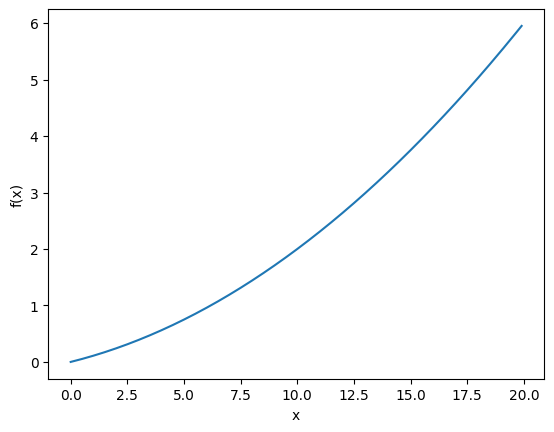

In [20]:
import numpy as np
import matplotlib.pylab as plt

x = np.arange(0.0,20.0,0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

In [21]:
y1_diff = numerical_diff(function_1,5)    # x=5일때의 미분
y2_diff = numerical_diff(function_1,10)   # x=10일때의 미분
print(y1_diff, y2_diff)

0.1999999999990898 0.2999999999986347


이렇게 계산한 미분 값이 x에 대한 f(x)의 변화량이다.  
즉, 함수의 기울기에 해당한다.  
또한 $f(x) = 0.01x^{2} + 0.1x$의 해석적 해는 $\frac{df(x)}{dx} = 0.02x + 0.1$이다.  x가 5와 10일 때의 '진정한 미분'은 차례로 0.2, 0.3이다.  
앞의 수치 미분과 결과를 비교하면 그 오차가 매우 작다.

### 4.3.3 편미분

$$f(x_0,x_1) = x_{0}^{2}+x_{1}^{2}$$

위 의 식은 다음과 같이 구현할 수 있다.

In [22]:
def function_2(x):
    return x[0]**2 + x[1]**2

인수 x가 넘파이 배열이라고 가정했을때 위의 코드는 넘파이 배열의 각 원소들을 제곱하고, 그 합을 구할  뿐인 간단한 구현이다
이를 그래프로 그리면 다음과 같다.

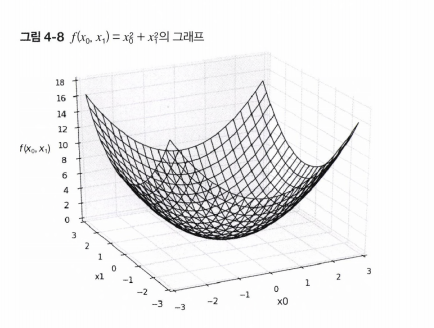

위의 식은 변수가 2개이므로 어느 변수에 대한 미분인지, 즉 $x_0$와 $x_1$ 중 어느 변수에 대한 미분인지 구별해야한다.

이와 같이 변수가 여럿인 함수에 대한 미분을 `편미분`이라고 한다.  
이 편미분을 수식으로는 $\frac{\partial f}{\partial x_0}$나 $\frac{\partial f}{\partial x_1}$처럼 쓴다.

Q1. $x_0 = 3$, $x_1 = 4$일때, $\frac{\partial f}{\partial x_0}$를 구하라

In [23]:
def func_1(x0):
    return x0*x0 + 4.0**2.0

In [24]:
numerical_diff(func_1,3.0)

6.00000000000378

Q2. $x_0 = 3$, $x_1 = 4$일때, $\frac{\partial f}{\partial x_1}$를 구하라.

In [25]:
def func_2(x1):
    return 3.0**2.0 + x1*x1

In [26]:
numerical_diff(func_2,4.0)

7.999999999999119

In [27]:
def numerical_gradient(f,x):
    h = 1e-4
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val +h
        fxh1 = f(x)
        # f(x-h) 계산
        x[idx] = tmp_val -h
        fxh2 = f(x)

        grad[idx] = (fxh1- fxh2) / (2*h)
        x[idx] = tmp_val #값 복원
    return grad

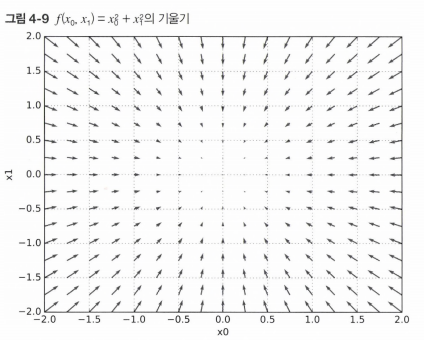

기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향이다.

In [28]:
# 경사하강법
def gradient_descent(f, init_x, lr = 0.01, step_num =100):
    x =  init_x

    for i in range(step_num):
        grad = numerical_gradient(f,x)
        x-=lr*grad
    return x

경사법 으로 $f(x_0,x_1) = x_{0}^2 + x_{1}^2$의   최솟값을  구하라.

In [29]:
def function_2(x):
    return x[0]**2 + x[1]**2
init_x = np.array([-3.0,4.0])
gradient_descent(function_2,init_x = init_x, lr = 0.1, step_num=100)

array([-6.11110793e-10,  8.14814391e-10])

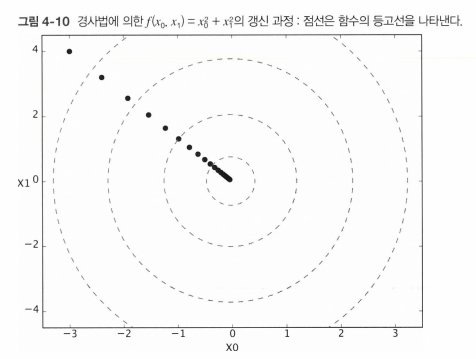

학습률이 너무 클 경우 발산해 버린다.

In [30]:
#학습률이 너무 큰 예 : lr = 10.0
init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x = init_x, lr = 10.0, step_num = 100)

array([-2.58983747e+13, -1.29524862e+12])

학습률이 너무 작으면 거의 갱신되지 않는다.

In [31]:
init_x = np.array([-3.0,4.0])
gradient_descent(function_2, init_x = init_x, lr = 1e-10, step_num = 100)

array([-2.99999994,  3.99999992])

학습률 같은 매개변수를 `하이퍼 파라미터`라고 한다.

### 4.4.2 신경망에서의 기울기

In [32]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [33]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)    #정규분포로 초기화
    def predict(self, x):    #예측 수행
        return np.dot(x,self.W)
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y,t)
        return loss

simpleNet 클래스는 형상이 2x3인 가중치 매개변수 하나를 인스턴스로 갖는다.  
메서드는 2개인데, 하나는 예측을 수행하는 predict(x)이고, 다른 하나는 손실함수의 값을 구하는 loss(x,t)이다.  
여기서 인수 x는 입력 데이터, t는 정답 레이블이다.

In [34]:
net = simpleNet()
print(net.W)    #가중치 매개변수

[[-0.15687093 -3.35039262 -1.04193697]
 [ 0.59082717 -0.74380372  1.14756652]]


In [35]:
x = np.array([0.6,0.9])
p = net.predict(x)
print(p)

[ 0.43762189 -2.67965892  0.40764769]


In [36]:
np.argmax(p)   #최댓값의 인덱스
t = np.array([0,0,1])   # 정답 레이블
net.loss(x,t)

0.7304681098367252

In [37]:
def f(W):
    return net.loss(x,t)
dw = numerical_gradient(f, net.W)

In [38]:
dw

array([[ 0.29780394,  0.01318599, -0.31098992],
       [ 0.4467059 ,  0.01977898, -0.46648488]])

### 4.5.1 2층 신경망 클래스 구현하기

In [39]:
import sys, os
sys.path.append(os.pardir)
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
    def __init__(self, input_size, hidden_size,
                 output_size, weight_init_std = 0.01):
        #가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std*\
                            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std*\
                            np.random.randn(hidden_size, output_size)
        self.params['b2'] = weight_init_std*\
                            np.zeros(output_size)
    def predict(self, x):
        W1,W2 = self.params['W1'], self.params['W2']
        b1,b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x,W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1,W2) + b2
        y = softmax(a2)

        return y

    def loss(self,x,t):
        y = self.predict(x)
        return cross_entropy_error(y,t)
    def accuracy(self,x,t):
        y = self.predict(x)
        y = np.argmax(y, axis = 1)
        t = np.argmax(t, axis = 1)

        accuracy = np.sum(y==t)/float(x.shape[0])
        return accuracy
    # x: 입력데이터, t:정답 레이블
    def numerical_gradient(self, x,t):
        loss_W = lambda W : self.loss(x,t)
        grads = {}
        grads['W1'] = numerical_gradient(loss_W,self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W,self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W,self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W,self.params['b2'])

        return grads

In [40]:
net=TwoLayerNet(input_size=784, hidden_size=100, output_size = 10)
net.params['W1'].shape #  (784,  100)

(784, 100)

In [41]:
net.params['b1'].shape #  (100,)

(100,)

In [42]:
net.params['W2'].shape #  (100,  10)

(100, 10)

In [43]:
net.params['b2'].shape #  (10,)

(10,)

### 4.5.2 미니배치 학습 구현하기

In [44]:
import numpy as np
from dataset.mnist import load_mnist
# from two_layer_net import TwoLayerNet

In [45]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize = True,
                                                  one_hot_label = True)
train_loss_list = []

#하이퍼파라미터
iters_num = 10000 #반복횟수

train_size = x_train.shape[0]
batch_size = 100  #미니배치 크기
learning_rate = 0.1

network = TwoLayerNet(input_size = 784, hidden_size = 50, output_size = 10)

for i in range(iters_num):
    #미니배치 획득 
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    #기울기 계산
    grad = network.numerical_gradient(x_batch, y_batch)

ModuleNotFoundError: No module named 'numpy._core'